In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 1000)

In [174]:
movies = pd.read_csv("movies.dat", sep="::", header=None)
movies.columns = ["movie_id", "title_year", "genres"]
movies.head(30)

C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


movie_id                                         title_year                        genres
0          1                                   Toy Story (1995)   Animation|Children's|Comedy
1          2                                     Jumanji (1995)  Adventure|Children's|Fantasy
2          3                            Grumpier Old Men (1995)                Comedy|Romance
3          4                           Waiting to Exhale (1995)                  Comedy|Drama
4          5                 Father of the Bride Part II (1995)                        Comedy
5          6                                        Heat (1995)         Action|Crime|Thriller
6          7                                     Sabrina (1995)                Comedy|Romance
7          8                                Tom and Huck (1995)          Adventure|Children's
8          9                                Sudden Death (1995)                        Action
9         10                                   GoldenEye (1995)     Action|Adventure|Thriller
10        11                     American President, The (1995)          Comedy|Drama|Romance
11        12                 Dracula: Dead and Loving It (1995)                 Comedy|Horror
12        13                                       Balto (1995)          Animation|Children's
13        14                                       Nixon (1995)                         Drama
14        15                            Cutthroat Island (1995)      Action|Adventure|Romance
15        16                                      Casino (1995)                Drama|Thriller
16        17                       Sense and Sensibility (1995)                 Drama|Romance
17        18                                  Four Rooms (1995)                      Thriller
18        19              Ace Ventura: When Nature Calls (1995)                        Comedy
19        20                                 Money Train (1995)                        Action
20        21                                  Get Shorty (1995)           Action|Comedy|Drama
21        22                                     Copycat (1995)          Crime|Drama|Thriller
22        23                                   Assassins (1995)                      Thriller
23        24                                      Powder (1995)                  Drama|Sci-Fi
24        25                           Leaving Las Vegas (1995)                 Drama|Romance
25        26                                     Othello (1995)                         Drama
26        27                                Now and Then (1995)                         Drama
27        28                                  Persuasion (1995)                       Romance
28        29                  City of Lost Children, The (1995)              Adventure|Sci-Fi
29        30  Shanghai Triad (Yao a yao yao dao waipo qiao) ...                         Drama

In [175]:
movies.describe()

movie_id
count  3883.000000
mean   1986.049446
std    1146.778349
min       1.000000
25%     982.500000
50%    2010.000000
75%    2980.500000
max    3952.000000

In [176]:
movies.isnull().sum()

movie_id      0
title_year    0
genres        0
dtype: int64

In [177]:
movies.dtypes

movie_id       int64
title_year    object
genres        object
dtype: object

In [178]:
movies_cleaned = movies.copy()
# title_year = movies_cleaned["title_year"].str.split('(', n=1, expand=True)
# movies_cleaned["title"] = title_year[0]
# movies_cleaned["year"] = title_year[1].str.replace(')', '')
# movies_cleaned.drop("title_year", axis=1, inplace=True)

movies_cleaned.head()

movie_id                          title_year                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

In [179]:
# pd.get_dummies( movies_cleaned["genres"].str.split('|', expand=True).stack() ).groupby(level=0).sum()

In [180]:
# movies_cleaned = movies.copy()
movies_cleaned = pd.concat( [movies_cleaned, pd.get_dummies( movies_cleaned["genres"].str.split('|', expand=True).stack() ).groupby(level=0).sum() ], axis=1 )
movies_cleaned.drop( "genres", axis=1, inplace=True )
# movies_cleaned.year.astype(int)

In [181]:
movies_cleaned.head()

movie_id                          title_year  Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western
0         1                    Toy Story (1995)       0          0          1           1       1      0            0      0        0          0       0        0        0        0       0         0    0        0
1         2                      Jumanji (1995)       0          1          0           1       0      0            0      0        1          0       0        0        0        0       0         0    0        0
2         3             Grumpier Old Men (1995)       0          0          0           0       1      0            0      0        0          0       0        0        0        1       0         0    0        0
3         4            Waiting to Exhale (1995)       0          0          0           0       1      0            0      1        0          0       0        0        0        0       0         0    0        0
4         5  Father of the Bride Part II (1995)       0          0          0           0       1      0            0      0        0          0       0        0        0        0       0         0    0        0

In [182]:
movies_cleaned["movie_id"] = movies_cleaned["movie_id"].astype('object')

movies_cleaned.dtypes

movie_id       object
title_year     object
Action          uint8
Adventure       uint8
Animation       uint8
Children's      uint8
Comedy          uint8
Crime           uint8
Documentary     uint8
Drama           uint8
Fantasy         uint8
Film-Noir       uint8
Horror          uint8
Musical         uint8
Mystery         uint8
Romance         uint8
Sci-Fi          uint8
Thriller        uint8
War             uint8
Western         uint8
dtype: object

In [183]:
ratings = pd.read_csv("ratings.dat", sep="::", header=None)
ratings.columns = ["user_id", "movie_id", "rating", "timestamp"]
ratings.head()

C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

In [184]:
ratings.describe()

user_id      movie_id        rating     timestamp
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00  9.722437e+08
std    1.728413e+03  1.096041e+03  1.117102e+00  1.215256e+07
min    1.000000e+00  1.000000e+00  1.000000e+00  9.567039e+08
25%    1.506000e+03  1.030000e+03  3.000000e+00  9.653026e+08
50%    3.070000e+03  1.835000e+03  4.000000e+00  9.730180e+08
75%    4.476000e+03  2.770000e+03  4.000000e+00  9.752209e+08
max    6.040000e+03  3.952000e+03  5.000000e+00  1.046455e+09

In [185]:
ratings.isnull().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [186]:
ratings.dtypes

user_id      int64
movie_id     int64
rating       int64
timestamp    int64
dtype: object

In [187]:
ratings_cleaned = ratings.copy()

ratings_cleaned[["user_id", "movie_id", "timestamp"]] = ratings_cleaned[["user_id", "movie_id", "timestamp"]].astype('object')

ratings_cleaned.dtypes

user_id      object
movie_id     object
rating        int64
timestamp    object
dtype: object

In [283]:
ratings_cleaned_new = pd.merge( ratings_cleaned[["movie_id", "user_id"]].groupby("movie_id", as_index=False).count(), ratings_cleaned[["movie_id", "rating"]].groupby("movie_id", as_index=False).mean(), on="movie_id" )
ratings_cleaned_new.head()

movie_id  user_id    rating
0         1     2077  4.146846
1         2      701  3.201141
2         3      478  3.016736
3         4      170  2.729412
4         5      296  3.006757

In [188]:
users = pd.read_csv("users.dat", sep="::", header=None)
users.columns = ["user_id", "gender", "age", "occupation", "zipcode"]
users.head()

C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


user_id gender  age  occupation zipcode
0        1      F    1          10   48067
1        2      M   56          16   70072
2        3      M   25          15   55117
3        4      M   45           7   02460
4        5      M   25          20   55455

In [189]:
users["age"].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

In [190]:
users["occupation"].value_counts()

4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
6     236
10    195
3     173
15    144
13    142
11    129
5     112
9      92
19     72
18     70
8      17
Name: occupation, dtype: int64

In [191]:
users["gender"].value_counts()

M    4331
F    1709
Name: gender, dtype: int64

In [192]:
users.groupby(["gender", "age"]).count()

user_id  occupation  zipcode
gender age                              
F      1         78          78       78
       18       298         298      298
       25       558         558      558
       35       338         338      338
       45       189         189      189
       50       146         146      146
       56       102         102      102
M      1        144         144      144
       18       805         805      805
       25      1538        1538     1538
       35       855         855      855
       45       361         361      361
       50       350         350      350
       56       278         278      278

In [193]:
users.describe()

user_id          age   occupation
count  6040.000000  6040.000000  6040.000000
mean   3020.500000    30.639238     8.146854
std    1743.742145    12.895962     6.329511
min       1.000000     1.000000     0.000000
25%    1510.750000    25.000000     3.000000
50%    3020.500000    25.000000     7.000000
75%    4530.250000    35.000000    14.000000
max    6040.000000    56.000000    20.000000

In [194]:
users.isnull().sum()

user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64

In [195]:
users.dtypes

user_id        int64
gender        object
age            int64
occupation     int64
zipcode       object
dtype: object

In [196]:
users_cleaned = users.copy()

users_cleaned["occupation"] = users_cleaned["occupation"].replace( list( range(21) ), [ "other", "academic_educator", "artist", "clerical_admin", "college_grad_student", "customer_service", "doctor_health_care", "executive_managerial", "farmer", "homemaker", "K-12_student", "lawyer", "programmer", "retired", "sales_marketing", "scientist", "self-employed", "technician_engineer", "tradesman_craftsman", "unemployed", "writer"] )

users_cleaned.head()

user_id gender  age            occupation zipcode
0        1      F    1          K-12_student   48067
1        2      M   56         self-employed   70072
2        3      M   25             scientist   55117
3        4      M   45  executive_managerial   02460
4        5      M   25                writer   55455

In [197]:
users_cleaned = pd.get_dummies( users_cleaned, columns=["gender"] )
users_cleaned.drop( "gender_F", axis=1, inplace=True )

users_cleaned.head()

user_id  age            occupation zipcode  gender_M
0        1    1          K-12_student   48067         0
1        2   56         self-employed   70072         1
2        3   25             scientist   55117         1
3        4   45  executive_managerial   02460         1
4        5   25                writer   55455         1

In [198]:
users_cleaned["age"] = users_cleaned["age"].replace( [ 1, 18, 25, 35, 45, 50, 56 ], [ "Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+" ] )

users_cleaned.head()

user_id       age            occupation zipcode  gender_M
0        1  Under 18          K-12_student   48067         0
1        2       56+         self-employed   70072         1
2        3     25-34             scientist   55117         1
3        4     45-49  executive_managerial   02460         1
4        5     25-34                writer   55455         1

In [199]:
users_cleaned = pd.get_dummies( users_cleaned, columns=["age"] )

users_cleaned.head()

user_id            occupation zipcode  gender_M  age_18-24  age_25-34  age_35-44  age_45-49  age_50-55  age_56+  age_Under 18
0        1          K-12_student   48067         0          0          0          0          0          0        0             1
1        2         self-employed   70072         1          0          0          0          0          0        1             0
2        3             scientist   55117         1          0          1          0          0          0        0             0
3        4  executive_managerial   02460         1          0          0          0          1          0        0             0
4        5                writer   55455         1          0          1          0          0          0        0             0

In [200]:
users_cleaned = pd.get_dummies( users_cleaned, columns=["occupation"], prefix="", prefix_sep="" )

users_cleaned.head()

user_id zipcode  gender_M  age_18-24  age_25-34  age_35-44  age_45-49  age_50-55  age_56+  age_Under 18  K-12_student  academic_educator  artist  clerical_admin  college_grad_student  customer_service  doctor_health_care  executive_managerial  farmer  homemaker  lawyer  other  programmer  retired  sales_marketing  scientist  self-employed  technician_engineer  tradesman_craftsman  unemployed  writer
0        1   48067         0          0          0          0          0          0        0             1             1                  0       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          0              0                    0                    0           0       0
1        2   70072         1          0          0          0          0          0        1             0             0                  0       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          0              1                    0                    0           0       0
2        3   55117         1          0          1          0          0          0        0             0             0                  0       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          1              0                    0                    0           0       0
3        4   02460         1          0          0          0          1          0        0             0             0                  0       0               0                     0                 0                   0                     1       0          0       0      0           0        0                0          0              0                    0                    0           0       0
4        5   55455         1          0          1          0          0          0        0             0             0                  0       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          0              0                    0                    0           0       1

In [201]:
users_cleaned.dtypes

user_id                  int64
zipcode                 object
gender_M                 uint8
age_18-24                uint8
age_25-34                uint8
age_35-44                uint8
age_45-49                uint8
age_50-55                uint8
age_56+                  uint8
age_Under 18             uint8
K-12_student             uint8
academic_educator        uint8
artist                   uint8
clerical_admin           uint8
college_grad_student     uint8
customer_service         uint8
doctor_health_care       uint8
executive_managerial     uint8
farmer                   uint8
homemaker                uint8
lawyer                   uint8
other                    uint8
programmer               uint8
retired                  uint8
sales_marketing          uint8
scientist                uint8
self-employed            uint8
technician_engineer      uint8
tradesman_craftsman      uint8
unemployed               uint8
writer                   uint8
dtype: object

In [202]:
users_cleaned.describe()

user_id     gender_M    age_18-24    age_25-34    age_35-44    age_45-49    age_50-55      age_56+  age_Under 18  K-12_student  academic_educator       artist  clerical_admin  college_grad_student  customer_service  doctor_health_care  executive_managerial       farmer    homemaker       lawyer        other   programmer      retired  sales_marketing    scientist  self-employed  technician_engineer  tradesman_craftsman   unemployed       writer
count  6040.000000  6040.000000  6040.000000  6040.000000  6040.000000  6040.000000  6040.000000  6040.000000   6040.000000   6040.000000        6040.000000  6040.000000     6040.000000           6040.000000       6040.000000         6040.000000           6040.000000  6040.000000  6040.000000  6040.000000  6040.000000  6040.000000  6040.000000      6040.000000  6040.000000    6040.000000          6040.000000          6040.000000  6040.000000  6040.000000
mean   3020.500000     0.717053     0.182616     0.347020     0.197517     0.091060     0.082119     0.062914      0.036755      0.032285           0.087417     0.044205        0.028642              0.125662          0.018543            0.039073              0.112417     0.002815     0.015232     0.021358     0.117715     0.064238     0.023510         0.050000     0.023841       0.039901             0.083113             0.011589     0.011921     0.046523
std    1743.742145     0.450468     0.386383     0.476062     0.398158     0.287718     0.274569     0.242828      0.188175      0.176770           0.282469     0.205568        0.166813              0.331496          0.134916            0.193784              0.315905     0.052982     0.122484     0.144585     0.322297     0.245197     0.151529         0.217963     0.152566       0.195742             0.276075             0.107037     0.108537     0.210633
min       1.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000      0.000000      0.000000           0.000000     0.000000        0.000000              0.000000          0.000000            0.000000              0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000         0.000000     0.000000       0.000000             0.000000             0.000000     0.000000     0.000000
25%    1510.750000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000      0.000000      0.000000           0.000000     0.000000        0.000000              0.000000          0.000000            0.000000              0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000         0.000000     0.000000       0.000000             0.000000             0.000000     0.000000     0.000000
50%    3020.500000     1.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000      0.000000      0.000000           0.000000     0.000000        0.000000              0.000000          0.000000            0.000000              0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000         0.000000     0.000000       0.000000             0.000000             0.000000     0.000000     0.000000
75%    4530.250000     1.000000     0.000000     1.000000     0.000000     0.000000     0.000000     0.000000      0.000000      0.000000           0.000000     0.000000        0.000000              0.000000          0.000000            0.000000              0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000         0.000000     0.000000       0.000000             0.000000             0.000000     0.000000     0.000000
max    6040.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000      1.000000      1.000000           1.000000     1.000000        1.000000              1.000000          1.000000            1.000000              1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.

## User-Age Distribution

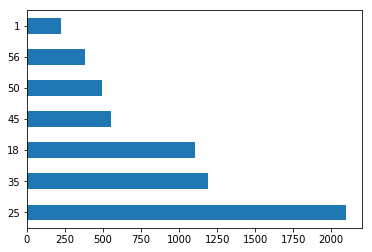

In [203]:
users.age.value_counts().plot(kind="barh")

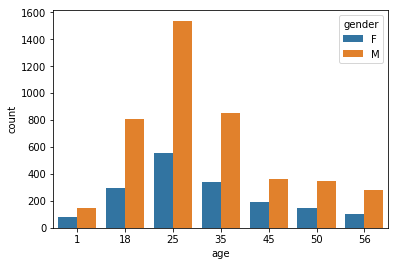

In [204]:
sns.countplot( x="age", data=users, hue="gender" )

In [205]:
ratings[ ratings.movie_id == 1 ].rating.mean()

4.146846413095811

In [206]:
ratings[["movie_id", "rating"]].groupby("movie_id", as_index=False).mean().sort_values(by="rating", ascending=False).head(25).reset_index(drop=True)

movie_id    rating
0        989  5.000000
1       3881  5.000000
2       1830  5.000000
3       3382  5.000000
4        787  5.000000
5       3280  5.000000
6       3607  5.000000
7       3233  5.000000
8       3172  5.000000
9       3656  5.000000
10      3245  4.800000
11        53  4.750000
12      2503  4.666667
13      2905  4.608696
14      2019  4.560510
15       318  4.554558
16       858  4.524966
17       745  4.520548
18        50  4.517106
19       527  4.510417
20      1148  4.507937
21      2309  4.500000
22      1795  4.500000
23      2480  4.500000
24       439  4.500000

In [207]:
ratings[ ratings.user_id == 2696 ]

user_id  movie_id  rating  timestamp
440667     2696      1258       4  973308710
440668     2696      1270       2  973308676
440669     2696      1617       4  973308842
440670     2696      1625       4  973308842
440671     2696      1644       2  973308920
440672     2696      1645       4  973308904
440673     2696      1805       4  973308886
440674     2696      1892       4  973308904
440675     2696       800       5  973308842
440676     2696      2338       2  973308920
440677     2696      1711       4  973308904
440678     2696      3176       4  973308865
440679     2696      2389       4  973308710
440680     2696      1589       3  973308865
440681     2696      2713       1  973308710
440682     2696      3386       1  973308842
440683     2696      1783       4  973308865
440684     2696       350       3  973308886
440685     2696      1092       4  973308886
440686     2696      1097       3  973308690

## Joining all cleaned table_data

In [208]:
master_data = pd.merge( users_cleaned, ratings_cleaned, on="user_id" )

master_data.head()

user_id zipcode  gender_M  age_18-24  age_25-34  age_35-44  age_45-49  age_50-55  age_56+  age_Under 18  K-12_student  academic_educator  artist  clerical_admin  college_grad_student  customer_service  doctor_health_care  executive_managerial  farmer  homemaker  lawyer  other  programmer  retired  sales_marketing  scientist  self-employed  technician_engineer  tradesman_craftsman  unemployed  writer movie_id  rating  timestamp
0       1   48067         0          0          0          0          0          0        0             1             1                  0       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          0              0                    0                    0           0       0     1193       5  978300760
1       1   48067         0          0          0          0          0          0        0             1             1                  0       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          0              0                    0                    0           0       0      661       3  978302109
2       1   48067         0          0          0          0          0          0        0             1             1                  0       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          0              0                    0                    0           0       0      914       3  978301968
3       1   48067         0          0          0          0          0          0        0             1             1                  0       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          0              0                    0                    0           0       0     3408       4  978300275
4       1   48067         0          0          0          0          0          0        0             1             1                  0       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          0              0                    0                    0           0       0     2355       5  978824291

In [209]:
master_data.columns

Index(['user_id', 'zipcode', 'gender_M', 'age_18-24', 'age_25-34', 'age_35-44', 'age_45-49', 'age_50-55', 'age_56+', 'age_Under 18', 'K-12_student', 'academic_educator', 'artist', 'clerical_admin', 'college_grad_student', 'customer_service', 'doctor_health_care', 'executive_managerial', 'farmer', 'homemaker', 'lawyer', 'other', 'programmer', 'retired', 'sales_marketing', 'scientist', 'self-employed', 'technician_engineer', 'tradesman_craftsman', 'unemployed', 'writer', 'movie_id', 'rating', 'timestamp'], dtype='object')

In [210]:
master_data = pd.merge( master_data, movies_cleaned, on="movie_id" )

master_data.head()

user_id zipcode  gender_M  age_18-24  age_25-34  age_35-44  age_45-49  age_50-55  age_56+  age_Under 18  K-12_student  academic_educator  artist  clerical_admin  college_grad_student  customer_service  doctor_health_care  executive_managerial  farmer  homemaker  lawyer  other  programmer  retired  sales_marketing  scientist  self-employed  technician_engineer  tradesman_craftsman  unemployed  writer movie_id  rating  timestamp                              title_year  Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western
0       1   48067         0          0          0          0          0          0        0             1             1                  0       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          0              0                    0                    0           0       0     1193       5  978300760  One Flew Over the Cuckoo's Nest (1975)       0          0          0           0       0      0            0      1        0          0       0        0        0        0       0         0    0        0
1       2   70072         1          0          0          0          0          0        1             0             0                  0       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          0              1                    0                    0           0       0     1193       5  978298413  One Flew Over the Cuckoo's Nest (1975)       0          0          0           0       0      0            0      1        0          0       0        0        0        0       0         0    0        0
2      12   32793         1          0          1          0          0          0        0             0             0                  0       0               0                     0                 0                   0                     0       0          0       0      0           1        0                0          0              0                    0                    0           0       0     1193       4  978220179  One Flew Over the Cuckoo's Nest (1975)       0          0          0           0       0      0            0      1        0          0       0        0        0        0       0         0    0        0
3      15   22903         1          0          1          0          0          0        0             0             0                  0       0               0                     0                 0                   0                     1       0          0       0      0           0        0                0          0              0                    0                    0           0       0     1193       4  978199279  One Flew Over the Cuckoo's Nest (1975)       0          0          0           0       0      0            0      1        0          0       0        0        0        0       0         0    0        0
4      17   95350         1          0          0          0          0          1        0             0             0                  1       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          0              0                    0                    0           0       0     1193       5  978158471  One Flew Over the Cuckoo's Nest (1975)       0          0          0           0       0      0            0      1        0          0       0        0        0        0       0         0    0        0

In [211]:
master_data.columns

Index(['user_id', 'zipcode', 'gender_M', 'age_18-24', 'age_25-34', 'age_35-44', 'age_45-49', 'age_50-55', 'age_56+', 'age_Under 18', 'K-12_student', 'academic_educator', 'artist', 'clerical_admin', 'college_grad_student', 'customer_service', 'doctor_health_care', 'executive_managerial', 'farmer', 'homemaker', 'lawyer', 'other', 'programmer', 'retired', 'sales_marketing', 'scientist', 'self-employed', 'technician_engineer', 'tradesman_craftsman', 'unemployed', 'writer', 'movie_id', 'rating', 'timestamp', 'title_year', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='object')

In [212]:
master_data.dtypes

user_id                 object
zipcode                 object
gender_M                 uint8
age_18-24                uint8
age_25-34                uint8
age_35-44                uint8
age_45-49                uint8
age_50-55                uint8
age_56+                  uint8
age_Under 18             uint8
K-12_student             uint8
academic_educator        uint8
artist                   uint8
clerical_admin           uint8
college_grad_student     uint8
customer_service         uint8
doctor_health_care       uint8
executive_managerial     uint8
farmer                   uint8
homemaker                uint8
lawyer                   uint8
other                    uint8
programmer               uint8
retired                  uint8
sales_marketing          uint8
scientist                uint8
self-employed            uint8
technician_engineer      uint8
tradesman_craftsman      uint8
unemployed               uint8
writer                   uint8
movie_id                object
rating  

In [213]:
master_data.describe(include="all")

user_id  zipcode      gender_M     age_18-24     age_25-34     age_35-44     age_45-49     age_50-55       age_56+  age_Under 18  K-12_student  academic_educator        artist  clerical_admin  college_grad_student  customer_service  doctor_health_care  executive_managerial        farmer     homemaker        lawyer         other    programmer       retired  sales_marketing     scientist  self-employed  technician_engineer  tradesman_craftsman    unemployed        writer   movie_id        rating    timestamp              title_year        Action     Adventure     Animation    Children's        Comedy         Crime   Documentary         Drama       Fantasy     Film-Noir        Horror       Musical       Mystery       Romance        Sci-Fi      Thriller           War       Western
count   1000209.0  1000209  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06       1.000209e+06  1.000209e+06    1.000209e+06          1.000209e+06      1.000209e+06        1.000209e+06          1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06     1.000209e+06  1.000209e+06   1.000209e+06         1.000209e+06         1.000209e+06  1.000209e+06  1.000209e+06  1000209.0  1.000209e+06    1000209.0                 1000209  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
unique     6040.0     3439           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN                NaN           NaN             NaN                   NaN               NaN                 NaN                   NaN           NaN           NaN           NaN           NaN           NaN           NaN              NaN           NaN            NaN                  NaN                  NaN           NaN           NaN     3706.0           NaN     458455.0                    3706           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN
top        4169.0    94110           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN                NaN           NaN             NaN                   NaN               NaN                 NaN                   NaN           NaN           NaN           NaN           NaN           NaN           NaN              NaN           NaN            NaN                  NaN                  NaN           NaN           NaN     2858.0           NaN  975528402.0  American Beauty (1999)           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN
freq       2314.0     3802           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN                NaN           NaN             NaN                   NaN               NaN                 NaN                   NaN           NaN           NaN           NaN           NaN           NaN           NaN              NaN           NaN            NaN                  NaN                  NaN           NaN           NaN     3428.0           NaN         30.0                    3428           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN
mean          NaN   

In [214]:
master_data.isnull().sum()

user_id                 0
zipcode                 0
gender_M                0
age_18-24               0
age_25-34               0
age_35-44               0
age_45-49               0
age_50-55               0
age_56+                 0
age_Under 18            0
K-12_student            0
academic_educator       0
artist                  0
clerical_admin          0
college_grad_student    0
customer_service        0
doctor_health_care      0
executive_managerial    0
farmer                  0
homemaker               0
lawyer                  0
other                   0
programmer              0
retired                 0
sales_marketing         0
scientist               0
self-employed           0
technician_engineer     0
tradesman_craftsman     0
unemployed              0
writer                  0
movie_id                0
rating                  0
timestamp               0
title_year              0
Action                  0
Adventure               0
Animation               0
Children's  

In [253]:
master_data["movie_id"].value_counts().rename_axis("movie_id").reset_index(name="counts")

movie_id  counts
0         2858    3428
1          260    2991
2         1196    2990
3         1210    2883
4          480    2672
5         2028    2653
6          589    2649
7         2571    2590
8         1270    2583
9          593    2578
10        1580    2538
11        1198    2514
12         608    2513
13        2762    2459
14         110    2443
15        2396    2369
16        1197    2318
17         527    2304
18        1617    2288
19        1265    2278
20        1097    2269
21        2628    2250
22        2997    2241
23         318    2227
24         858    2223
25         356    2194
26        2716    2181
27         296    2171
28        1240    2098
29           1    2077
...        ...     ...
3676       624       1
3677      2213       1
3678      2619       1
3679       396       1
3680      2039       1
3681      2277       1
3682      1843       1
3683      3904       1
3684      2254       1
3685      3607       1
3686       226       1
3687      1709       1
3688      3881       1
3689      3647       1
3690       658       1
3691      3172       1
3692       655       1
3693      2235       1
3694       651       1
3695       644       1
3696      3220       1
3697      2226       1
3698      3656       1
3699       642       1
3700       641       1
3701      2218       1
3702      2217       1
3703      3382       1
3704      2214       1
3705       402       1

[3706 rows x 2 columns]

In [256]:
master_data_new = pd.merge( master_data, master_data["movie_id"].value_counts().rename_axis("movie_id").reset_index(name="counts"), on="movie_id" )

master_data_new.head()

user_id zipcode  gender_M  age_18-24  age_25-34  age_35-44  age_45-49  age_50-55  age_56+  age_Under 18  K-12_student  academic_educator  artist  clerical_admin  college_grad_student  customer_service  doctor_health_care  executive_managerial  farmer  homemaker  lawyer  other  programmer  retired  sales_marketing  scientist  self-employed  technician_engineer  tradesman_craftsman  unemployed  writer movie_id  rating  timestamp                              title_year  Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  counts
0       1   48067         0          0          0          0          0          0        0             1             1                  0       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          0              0                    0                    0           0       0     1193       5  978300760  One Flew Over the Cuckoo's Nest (1975)       0          0          0           0       0      0            0      1        0          0       0        0        0        0       0         0    0        0    1725
1       2   70072         1          0          0          0          0          0        1             0             0                  0       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          0              1                    0                    0           0       0     1193       5  978298413  One Flew Over the Cuckoo's Nest (1975)       0          0          0           0       0      0            0      1        0          0       0        0        0        0       0         0    0        0    1725
2      12   32793         1          0          1          0          0          0        0             0             0                  0       0               0                     0                 0                   0                     0       0          0       0      0           1        0                0          0              0                    0                    0           0       0     1193       4  978220179  One Flew Over the Cuckoo's Nest (1975)       0          0          0           0       0      0            0      1        0          0       0        0        0        0       0         0    0        0    1725
3      15   22903         1          0          1          0          0          0        0             0             0                  0       0               0                     0                 0                   0                     1       0          0       0      0           0        0                0          0              0                    0                    0           0       0     1193       4  978199279  One Flew Over the Cuckoo's Nest (1975)       0          0          0           0       0      0            0      1        0          0       0        0        0        0       0         0    0        0    1725
4      17   95350         1          0          0          0          0          1        0             0             0                  1       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          0              0                    0                    0           0       0     1193       5  978158471  One Flew Over the Cuckoo's Nest (1975)       0          0          0           0       0      0            0      1        0          0       0        0        0        0       0         0    0        0    1725

# Modeling

In [259]:
feature_cols = [col for col in master_data_new.columns if master_data_new[col].dtype != 'object']

feature_cols

['gender_M',
 'age_18-24',
 'age_25-34',
 'age_35-44',
 'age_45-49',
 'age_50-55',
 'age_56+',
 'age_Under 18',
 'K-12_student',
 'academic_educator',
 'artist',
 'clerical_admin',
 'college_grad_student',
 'customer_service',
 'doctor_health_care',
 'executive_managerial',
 'farmer',
 'homemaker',
 'lawyer',
 'other',
 'programmer',
 'retired',
 'sales_marketing',
 'scientist',
 'self-employed',
 'technician_engineer',
 'tradesman_craftsman',
 'unemployed',
 'writer',
 'rating',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western',
 'counts']

In [217]:
feature_cols = ['gender_M', 'age_18-24', 'age_25-34', 'age_35-44', 'age_45-49', 'age_50-55', 'age_56+', 'age_Under 18', 'rating', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western' ]

feature_cols

['gender_M',
 'age_18-24',
 'age_25-34',
 'age_35-44',
 'age_45-49',
 'age_50-55',
 'age_56+',
 'age_Under 18',
 'rating',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [305]:
master_data_cleaned = master_data_new[feature_cols]

master_data_cleaned.head()

gender_M  age_18-24  age_25-34  age_35-44  age_45-49  age_50-55  age_56+  age_Under 18  K-12_student  academic_educator  artist  clerical_admin  college_grad_student  customer_service  doctor_health_care  executive_managerial  farmer  homemaker  lawyer  other  programmer  retired  sales_marketing  scientist  self-employed  technician_engineer  tradesman_craftsman  unemployed  writer  rating  Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  counts
0         0          0          0          0          0          0        0             1             1                  0       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          0              0                    0                    0           0       0       5       0          0          0           0       0      0            0      1        0          0       0        0        0        0       0         0    0        0    1725
1         1          0          0          0          0          0        1             0             0                  0       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          0              1                    0                    0           0       0       5       0          0          0           0       0      0            0      1        0          0       0        0        0        0       0         0    0        0    1725
2         1          0          1          0          0          0        0             0             0                  0       0               0                     0                 0                   0                     0       0          0       0      0           1        0                0          0              0                    0                    0           0       0       4       0          0          0           0       0      0            0      1        0          0       0        0        0        0       0         0    0        0    1725
3         1          0          1          0          0          0        0             0             0                  0       0               0                     0                 0                   0                     1       0          0       0      0           0        0                0          0              0                    0                    0           0       0       4       0          0          0           0       0      0            0      1        0          0       0        0        0        0       0         0    0        0    1725
4         1          0          0          0          0          1        0             0             0                  1       0               0                     0                 0                   0                     0       0          0       0      0           0        0                0          0              0                    0                    0           0       0       5       0          0          0           0       0      0            0      1        0          0       0        0        0        0       0         0    0        0    1725

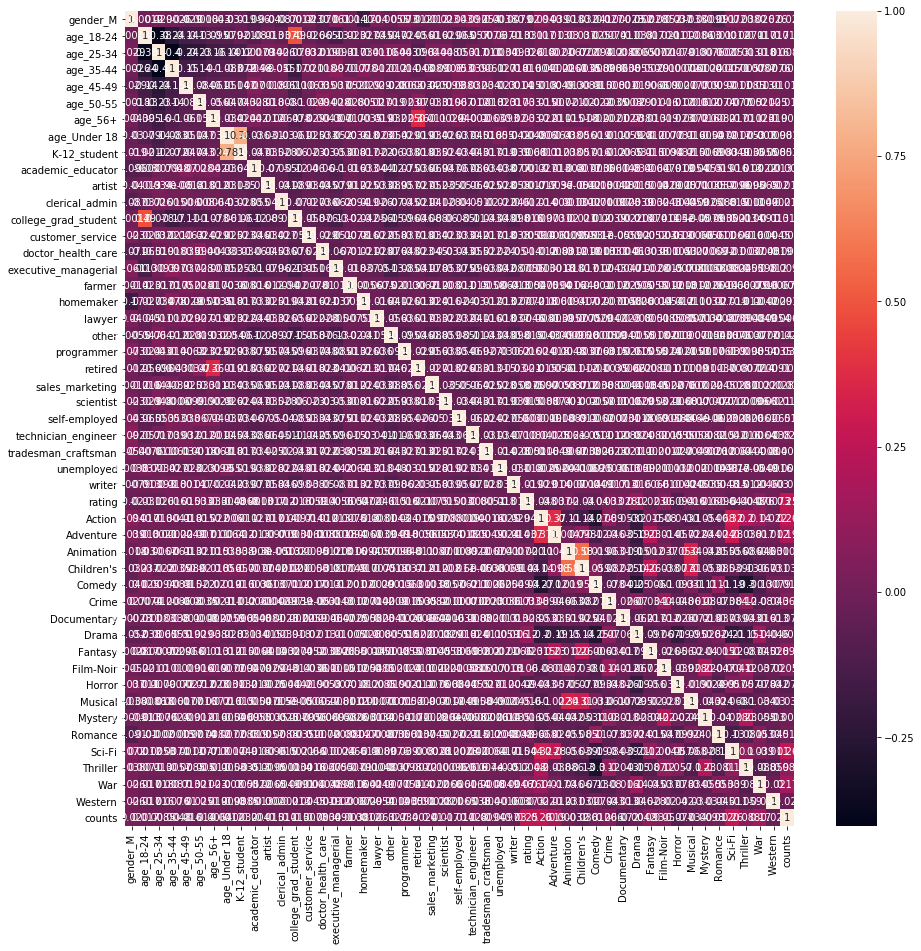

In [261]:
plt.figure(figsize=(15, 15))
sns.heatmap( master_data_cleaned.corr(), annot=True )

In [306]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

train_X, test_X, train_y, test_y = train_test_split( master_data_cleaned.drop("rating", axis=1), master_data_cleaned["rating"], test_size=0.30 )

scaler = MinMaxScaler()
scaler.fit_transform(train_X)
scaler.fit_transform(test_X)

rfr = RandomForestClassifier()

rfr.fit( train_X, train_y )

y_pred = rfr.predict(train_X)
accuracy_score(y_pred, train_y)
# rfr.score(train_X, train_y)

C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5904354234688194

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_X, test_X, train_y, test_y = train_test_split( master_data_cleaned.drop("rating", axis=1), master_data_cleaned["rating"], test_size=0.30 )

dtc = DecisionTreeClassifier()
dtc.fit( train_X, train_y )

y_pred = dtc.predict(test_X)
accuracy_score(y_pred, test_y)

0.34978321219210634

### Again Cleaning

In [292]:
movies_cleaned.describe(include="all")

movie_id        title_year       Action    Adventure    Animation   Children's       Comedy        Crime  Documentary        Drama      Fantasy    Film-Noir       Horror      Musical      Mystery      Romance       Sci-Fi     Thriller          War      Western
count     3883.0              3883  3883.000000  3883.000000  3883.000000  3883.000000  3883.000000  3883.000000  3883.000000  3883.000000  3883.000000  3883.000000  3883.000000  3883.000000  3883.000000  3883.000000  3883.000000  3883.000000  3883.000000  3883.000000
unique    3883.0              3883          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN
top       3952.0  Firestorm (1998)          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN
freq         1.0                 1          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN
mean         NaN               NaN     0.129539     0.072882     0.027041     0.064641     0.309039     0.054339     0.032707     0.412825     0.017512     0.011331     0.088334     0.029359     0.027298     0.121298     0.071079     0.126706     0.036827     0.017512
std          NaN               NaN     0.335839     0.259976     0.162224     0.245923     0.462157     0.226715     0.177891     0.492405     0.131187     0.105858     0.283816     0.168832     0.162973     0.326515     0.256990     0.332686     0.188362     0.131187
min          NaN               NaN     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
25%          NaN               NaN     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
50%          NaN               NaN     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
75%          NaN               NaN     0.000000     0.000000     0.000000     0.000000     1.000000     0.000000     0.000000     1.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
max          NaN               NaN     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000     1.000000

In [289]:
ratings_cleaned_new

movie_id  user_id    rating
0            1     2077  4.146846
1            2      701  3.201141
2            3      478  3.016736
3            4      170  2.729412
4            5      296  3.006757
5            6      940  3.878723
6            7      458  3.410480
7            8       68  3.014706
8            9      102  2.656863
9           10      888  3.540541
10          11     1033  3.793804
11          12      160  2.362500
12          13       99  3.262626
13          14      153  3.542484
14          15      146  2.458904
15          16      682  3.793255
16          17      835  4.027545
17          18      157  3.337580
18          19      389  2.480720
19          20      160  2.537500
20          21     1356  3.623894
21          22      378  3.349206
22          23      126  2.857143
23          24      624  3.179487
24          25      980  3.651020
25          26      100  3.530000
26          27       61  2.934426
27          28      179  4.055866
28          29      403  4.062035
29          30       74  3.648649
...        ...      ...       ...
3676      3923      104  2.576923
3677      3924       26  2.923077
3678      3925      124  3.854839
3679      3926      180  3.361111
3680      3927      348  3.580460
3681      3928      206  3.441748
3682      3929      147  3.993197
3683      3930      223  3.255605
3684      3931       27  2.037037
3685      3932      232  3.750000
3686      3933       16  2.250000
3687      3934       28  3.035714
3688      3935       23  3.000000
3689      3936      112  3.723214
3690      3937      135  2.940741
3691      3938       27  1.925926
3692      3939       26  1.961538
3693      3940       15  1.733333
3694      3941       22  2.045455
3695      3942       28  1.785714
3696      3943       96  3.052083
3697      3944        9  2.111111
3698      3945       43  1.488372
3699      3946      100  2.260000
3700      3947       55  3.472727
3701      3948      862  3.635731
3702      3949      304  4.115132
3703      3950       54  3.666667
3704      3951       40  3.900000
3705      3952      388  3.780928

[3706 rows x 3 columns]

In [300]:
master_data_cleaned_new = pd.merge( left=ratings_cleaned_new, right=movies_cleaned, how="left", on="movie_id" )
master_data_cleaned_new.rename(columns={"user_id": "user_counts"}, inplace=True)

master_data_cleaned_new.head(20)

movie_id  user_counts    rating                             title_year  Action  Adventure  Animation  Children's  Comedy  Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western
0         1         2077  4.146846                       Toy Story (1995)       0          0          1           1       1      0            0      0        0          0       0        0        0        0       0         0    0        0
1         2          701  3.201141                         Jumanji (1995)       0          1          0           1       0      0            0      0        1          0       0        0        0        0       0         0    0        0
2         3          478  3.016736                Grumpier Old Men (1995)       0          0          0           0       1      0            0      0        0          0       0        0        0        1       0         0    0        0
3         4          170  2.729412               Waiting to Exhale (1995)       0          0          0           0       1      0            0      1        0          0       0        0        0        0       0         0    0        0
4         5          296  3.006757     Father of the Bride Part II (1995)       0          0          0           0       1      0            0      0        0          0       0        0        0        0       0         0    0        0
5         6          940  3.878723                            Heat (1995)       1          0          0           0       0      1            0      0        0          0       0        0        0        0       0         1    0        0
6         7          458  3.410480                         Sabrina (1995)       0          0          0           0       1      0            0      0        0          0       0        0        0        1       0         0    0        0
7         8           68  3.014706                    Tom and Huck (1995)       0          1          0           1       0      0            0      0        0          0       0        0        0        0       0         0    0        0
8         9          102  2.656863                    Sudden Death (1995)       1          0          0           0       0      0            0      0        0          0       0        0        0        0       0         0    0        0
9        10          888  3.540541                       GoldenEye (1995)       1          1          0           0       0      0            0      0        0          0       0        0        0        0       0         1    0        0
10       11         1033  3.793804         American President, The (1995)       0          0          0           0       1      0            0      1        0          0       0        0        0        1       0         0    0        0
11       12          160  2.362500     Dracula: Dead and Loving It (1995)       0          0          0           0       1      0            0      0        0          0       1        0        0        0       0         0    0        0
12       13           99  3.262626                           Balto (1995)       0          0          1           1       0      0            0      0        0          0       0        0        0        0       0         0    0        0
13       14          153  3.542484                           Nixon (1995)       0          0          0           0       0      0            0      1        0          0       0        0        0        0       0         0    0        0
14       15          146  2.458904                Cutthroat Island (1995)       1          1          0           0       0      0            0      0        0          0       0        0        0        1       0         0    0        0
15       16          682  3.793255                          Casino (1995)       0          0          0           0       0      0            0      1        0          0       0        0        

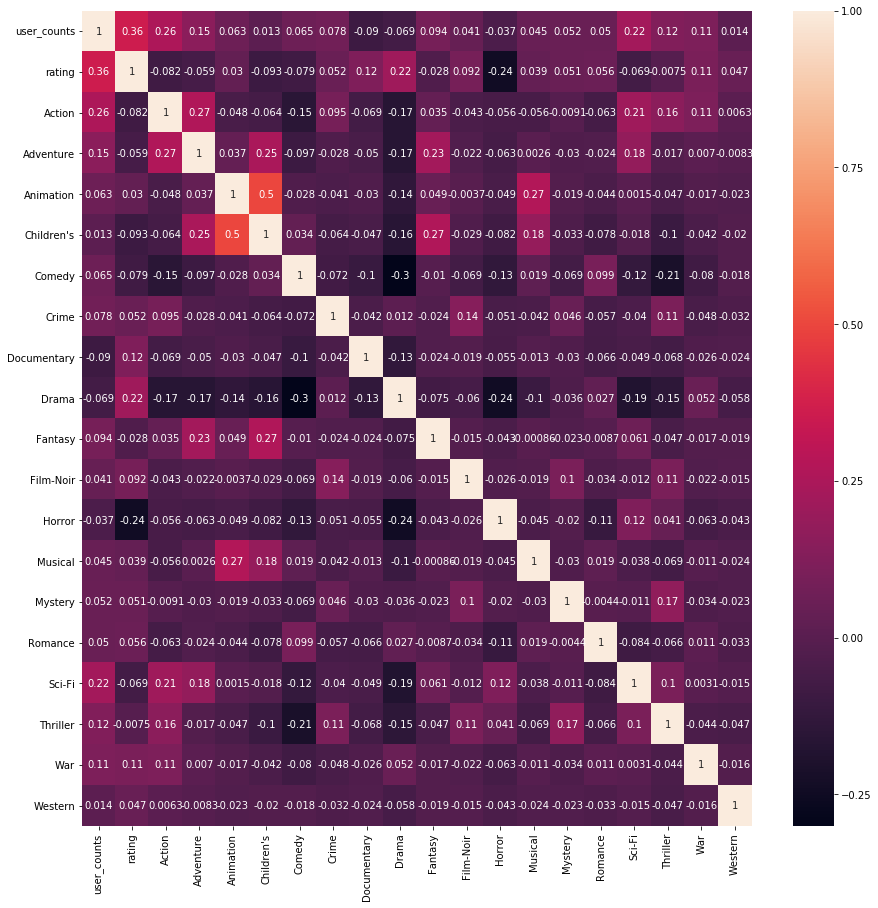

In [302]:
plt.figure(figsize=(15, 15))
sns.heatmap( master_data_cleaned_new.corr(), annot=True )

In [304]:
master_data_cleaned_new.shape

(3706, 22)

In [312]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

train_X, test_X, train_y, test_y = train_test_split( master_data_cleaned_new.drop(["movie_id", "title_year", "rating"], axis=1), master_data_cleaned_new["rating"], test_size=0.30 )

scaler = MinMaxScaler()
scaler.fit_transform(train_X)
scaler.fit_transform(test_X)

rfr = RandomForestRegressor()
rfr.fit( train_X, train_y )

rfr.score(train_X, train_y)
# y_pred = rfr.predict(train_X)
# accuracy_score(y_pred, train_y)

C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\shikhar.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7004768935989774